In [ ]:
# update pip
!/opt/venv/bin/python -m pip install --upgrade pip

# module installs
!pip install pandas numpy tqdm plotly ftfy tweet-preprocessor

Requirement already up-to-date: pip in /opt/venv/lib/python3.7/site-packages (20.2.4)


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import ftfy
pd.options.plotting.backend = "plotly"
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_white"
import preprocessor as p

/opt/venv/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
DEPRESSION1 = "./unprocessed/depressedDataset1.csv"
DEPRESSION2 = "./unprocessed/depressedDataset2.csv"
NEUTRALSET = "./unprocessed/kaggleSentimentDataset.csv"

In [ ]:
depressed1 = pd.read_csv(DEPRESSION1)
depressed2 = pd.read_csv(DEPRESSION2, sep = '|', header = None, usecols = range(0,9))

In [ ]:
depressed1

,id,date,tweet
0,1321511692854059011,2020-10-28 17:58:34+00:00,@Depression__D قناتي تيلجرام بتعجبكم \nt.me/Aw...
1,1321511683010056192,2020-10-28 17:58:32+00:00,It’s not a descent into seasonal depression it...
2,1321511664655699969,2020-10-28 17:58:28+00:00,on te la diag à quel âge la dépression — 15/16...
3,1321511663267446785,2020-10-28 17:58:27+00:00,"If #Trump wins life goes back to normal, famil..."
4,1321511659677077504,2020-10-28 17:58:26+00:00,My rock-bottom is leaving all of my friends b/...
...,...,...,...
29996,1321158008332664833,2020-10-27 18:33:09+00:00,We have to stop talking about “Mental Illness”...
29997,1321158004264341506,2020-10-27 18:33:08+00:00,@tal7291 @DanLairdMD I disagree. If one has fi...
29998,1321157990276280334,2020-10-27 18:33:05+00:00,J’vais tomber en dépression twitter.com/ojwess...
29999,1321157987671674882,2020-10-27 18:33:04+00:00,@clueles43767396 @KlickmichOrg @JuleStinkesock...


In [ ]:
depressed2.columns = ['id', 'date', 'time', "zone", "user", "tweet", 'key1', 'key2', 'key3']
depressed2

,id,date,time,zone,user,tweet,key1,key2,key3
0,989292962323615744,2018-04-25,23:59:57,Eastern Standard Time,whosalli,The lack of this understanding is a small but ...,1,0,3
1,989292959844663296,2018-04-25,23:59:56,Eastern Standard Time,estermnunes,i just told my parents about my depression and...,1,0,2
2,989292951716155392,2018-04-25,23:59:54,Eastern Standard Time,TheAlphaAries,depression is something i don't speak about ev...,0,0,0
3,989292873664393218,2018-04-25,23:59:35,Eastern Standard Time,_ojhodgson,Made myself a tortilla filled with pb&j. My de...,1,0,0
4,989292856119472128,2018-04-25,23:59:31,Eastern Standard Time,DMiller96371630,@WorldofOutlaws I am gonna need depression med...,0,0,0
...,...,...,...,...,...,...,...,...,...
2340,989036568781389830,2018-04-25,07:01:08,Eastern Standard Time,WhatTheFFacts,Many sufferers of depression aren't sad; they ...,28,1200,4681
2341,989036542898397185,2018-04-25,07:01:01,Eastern Standard Time,luvsguap,No Depression by G Herbo is my mood from now o...,0,0,2
2342,989036488162766848,2018-04-25,07:00:48,Eastern Standard Time,AyJaxxWhitney,What do you do when depression succumbs the br...,0,0,4
2343,989036488158572544,2018-04-25,07:00:48,Eastern Standard Time,joseholist,Ketamine Nasal Spray Shows Promise Against Dep...,0,0,0


Now to combine these sets and save it as processed

In [ ]:
deprestext1 = pd.DataFrame(depressed1, columns=['tweet'])
deprestext2 = pd.DataFrame(depressed2, columns=['tweet'])

Fixing the 1st corpus

In [ ]:
deprestext1.tweet = deprestext1.tweet.progress_apply(ftfy.fix_text)

100%|██████████| 30001/30001 [00:05<00:00, 5929.66it/s]


In [ ]:
deprestext1

,tweet
0,@Depression__D قناتي تيلجرام بتعجبكم \nt.me/Aw...
1,It's not a descent into seasonal depression it...
2,on te la diag à quel âge la dépression — 15/16...
3,"If #Trump wins life goes back to normal, famil..."
4,My rock-bottom is leaving all of my friends b/...
...,...
29996,"We have to stop talking about ""Mental Illness""..."
29997,@tal7291 @DanLairdMD I disagree. If one has fi...
29998,J'vais tomber en dépression twitter.com/ojwess...
29999,@clueles43767396 @KlickmichOrg @JuleStinkesock...


Fixing the second depressed corpus

In [ ]:
deprestext2.fillna(value=" ", inplace=True)
deprestext2.tweet = deprestext2.tweet.progress_apply(ftfy.fix_text)

100%|██████████| 2345/2345 [00:00<00:00, 7467.95it/s]


In [ ]:
deprestext2

,tweet
0,The lack of this understanding is a small but ...
1,i just told my parents about my depression and...
2,depression is something i don't speak about ev...
3,Made myself a tortilla filled with pb&j. My de...
4,@WorldofOutlaws I am gonna need depression med...
...,...
2340,Many sufferers of depression aren't sad; they ...
2341,No Depression by G Herbo is my mood from now o...
2342,What do you do when depression succumbs the br...
2343,Ketamine Nasal Spray Shows Promise Against Dep...


Making the final depressed df

In [ ]:
depressedFinal = final_df = pd.concat([deprestext1, deprestext2], ignore_index=True)

In [ ]:
depressedFinal

,tweet
0,@Depression__D قناتي تيلجرام بتعجبكم \nt.me/Aw...
1,It's not a descent into seasonal depression it...
2,on te la diag à quel âge la dépression — 15/16...
3,"If #Trump wins life goes back to normal, famil..."
4,My rock-bottom is leaving all of my friends b/...
...,...
32341,Many sufferers of depression aren't sad; they ...
32342,No Depression by G Herbo is my mood from now o...
32343,What do you do when depression succumbs the br...
32344,Ketamine Nasal Spray Shows Promise Against Dep...


In [ ]:
depressedFinal.to_csv("./depressedTweets.csv", index=False)

Processing the netutral set now

In [ ]:
randomtweets = pd.read_csv(NEUTRALSET, encoding = "UTF-8", usecols = range(0,4))

In [ ]:
randomtweets

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...
...,...,...,...,...
1578609,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578610,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578611,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578612,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
randomtext = pd.DataFrame(randomtweets, columns=['SentimentText'])
randomtext = randomtext.rename(columns={'SentimentText':'tweet'})

In [ ]:
randomtext

,tweet
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7:30 :O
3,.. Omgaga. Im sooo im gunna CRy. I'...
4,i think mi bf is cheating on me!!! ...
...,...
1578609,Zzzzzz.... Finally! Night tweeters!
1578610,"Zzzzzzz, sleep well people"
1578611,ZzzZzZzzzZ... wait no I have homework.
1578612,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
randomtext.tweet = randomtext.tweet.progress_apply(ftfy.fix_text)

100%|██████████| 1578614/1578614 [01:28<00:00, 17935.89it/s]


In [ ]:
randomtext

,tweet
0,is so sad for my APL frie...
1,I missed the New Moon trail...
2,omg its already 7:30 :O
3,.. Omgaga. Im sooo im gunna CRy. I'...
4,i think mi bf is cheating on me!!! ...
...,...
1578609,Zzzzzz.... Finally! Night tweeters!
1578610,"Zzzzzzz, sleep well people"
1578611,ZzzZzZzzzZ... wait no I have homework.
1578612,"ZzZzzzZZZZzzz meh, what am I doing up again?"


In [ ]:
randomtext.to_csv("./neutralTweets.csv", index=False)

Making a wordcloud and other visualisations

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as mplt

In [ ]:
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop = set(stop)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
depressedFinal['tweet'] = depressedFinal['tweet'].progress_apply(lambda x: p.clean(' '.join([word for word in x.split() if word not in (stop)])))
randomtext['tweet'] = randomtext['tweet'].progress_apply(lambda x: p.clean(' '.join([word for word in x.split() if word not in (stop)])))

100%|██████████| 1578614/1578614 [02:06<00:00, 12521.51it/s]


100%|██████████| 32346/32346 [00:00<00:00, 2640912.50it/s]


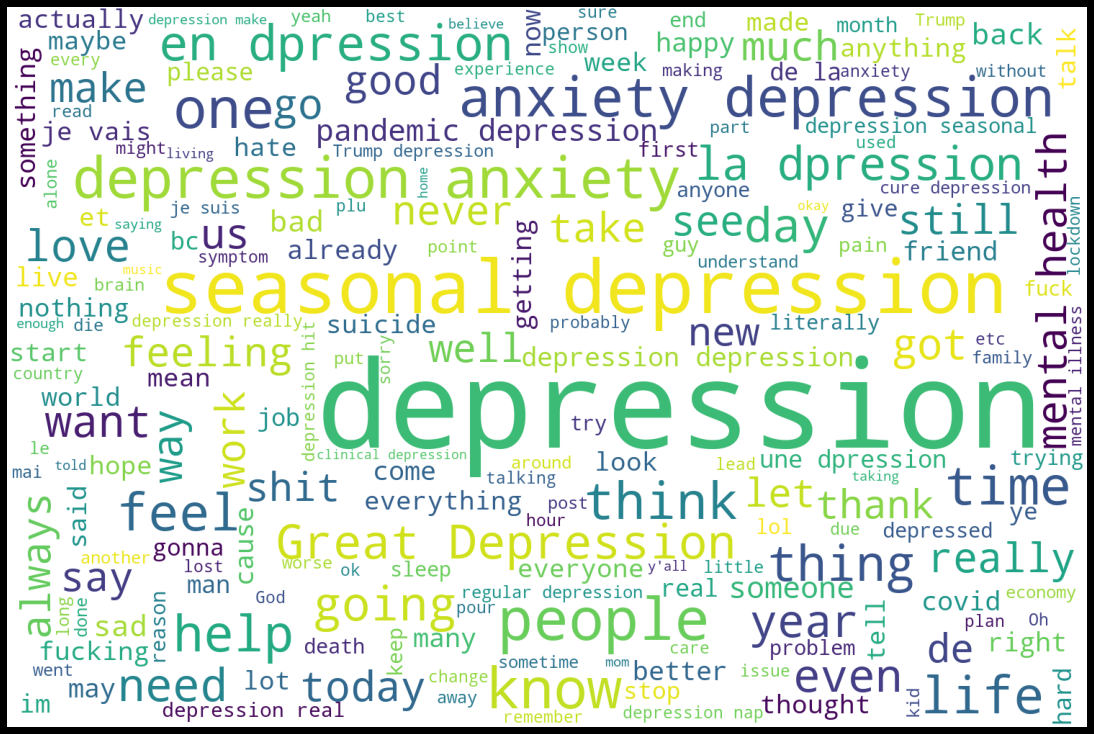

In [ ]:
depressedCloud =  WordCloud(background_color='white',
                            width = 1500,
                            height = 1000).generate(' '.join(tqdm(depressedFinal['tweet'])))
mplt.figure(figsize=(15,10), facecolor='k')
mplt.imshow(depressedCloud)
mplt.axis("off")
mplt.tight_layout(pad=0)
mplt.show()

In [ ]:
randomCloud = WordCloud(background_color='white',
                        width = 1500,
                        height = 1000).generate(' '.join(tqdm(randomtext['tweet'])))
mplt.figure(figsize=(15,10), facecolor='k')
mplt.imshow(randomCloud)
mplt.axis("off")
mplt.tight_layout(pad=0)
mplt.show()

In [ ]:
depressFreq = depressedFinal.tweet.str.split(expand=True).stack().value_counts()
depressFreq[:20]

depression     18188
I              12249
Depression      3052
like            2641
dpression       2593
I'm             2449
depression,     2305
depression.     2293
de              2291
&               2059
seasonal        2013
anxiety         1807
get             1794
la              1769
people          1656
en              1645
The             1542
.               1346
je              1334
feel            1293
dtype: int64

In [ ]:
px.bar(depressFreq[:20])

In [ ]:
normalFreq = randomtext.tweet.str.split(expand=True).stack().value_counts()
normalFreq[:20]

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
px.bar(normalFreq[:20])